In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
tips = pd.read_csv('tip.csv')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe(include='all') 

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [6]:
tips.shape

(244, 7)

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

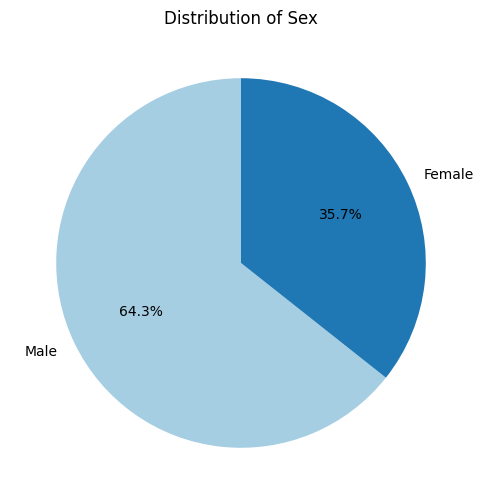

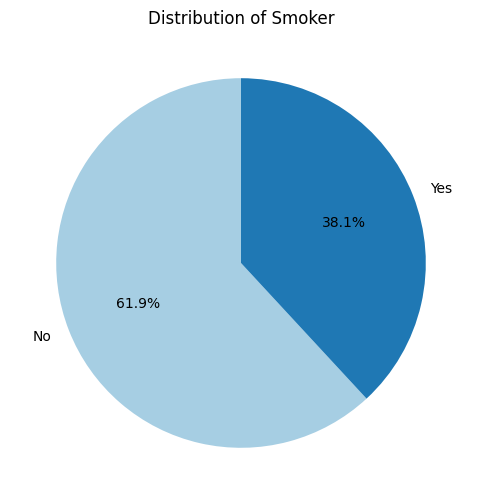

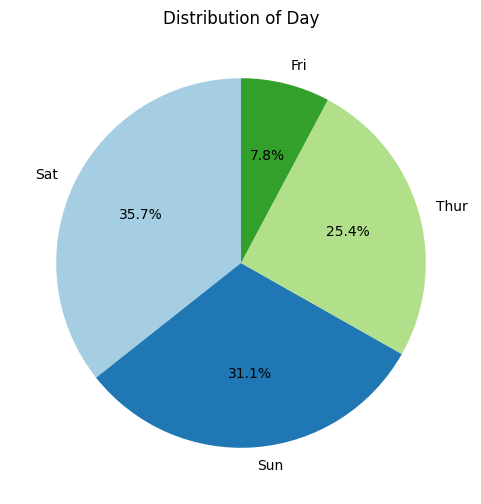

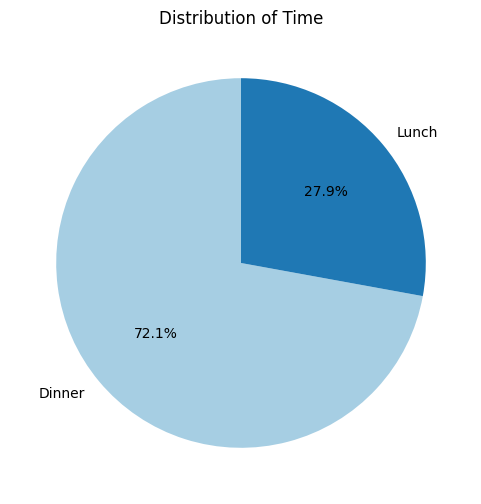

In [9]:
nominal_columns = ["sex", "smoker", "day", "time"]

# Plot pie charts
for column in nominal_columns:
    plt.figure(figsize=(6, 6))
    tips[column].value_counts().plot.pie(
        autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors
    )
    plt.title(f"Distribution of {column.capitalize()}")
    plt.ylabel("")  # Remove the y-label for better visualization
    plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

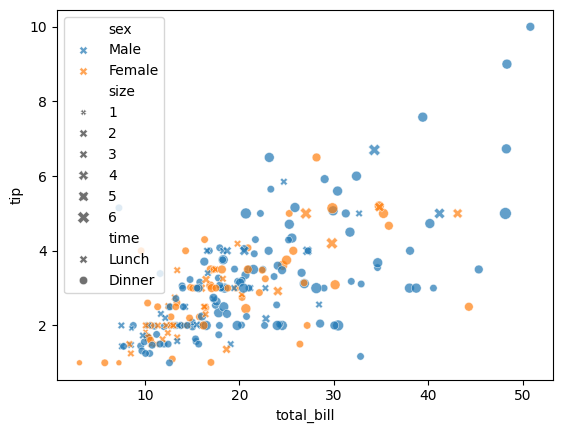

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', size='size', hue='sex', style='time', alpha=0.7)


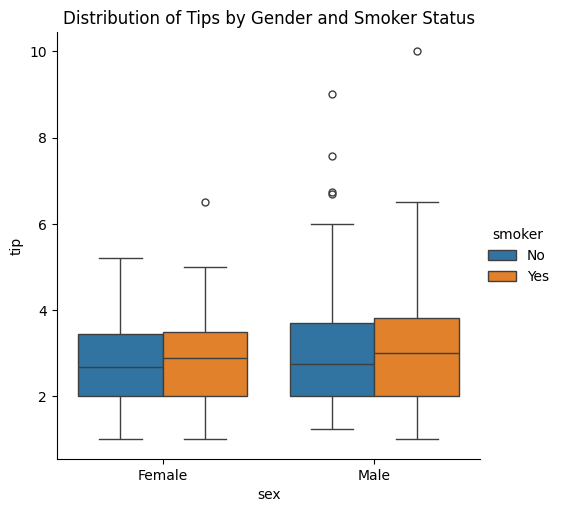

In [11]:
sns.catplot(x = 'sex',y = 'tip',data=tips,
            kind = 'box',hue = 'smoker')
plt.title('Distribution of Tips by Gender and Smoker Status')
plt.show();

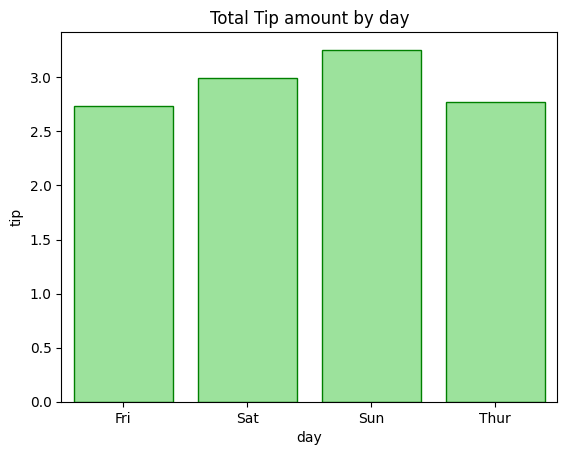

In [12]:
# Group data by day and calculate average tip amount
avg_tip_by_day = tips.groupby('day')['tip'].mean().reset_index()
# Sort the DataFrame by day
avg_tip_by_day = avg_tip_by_day.sort_values(by='day')


sns.barplot(x=avg_tip_by_day['day'],y=avg_tip_by_day['tip'],color='lightgreen',edgecolor='green')
plt.title('Total Tip amount by day')

plt.show();

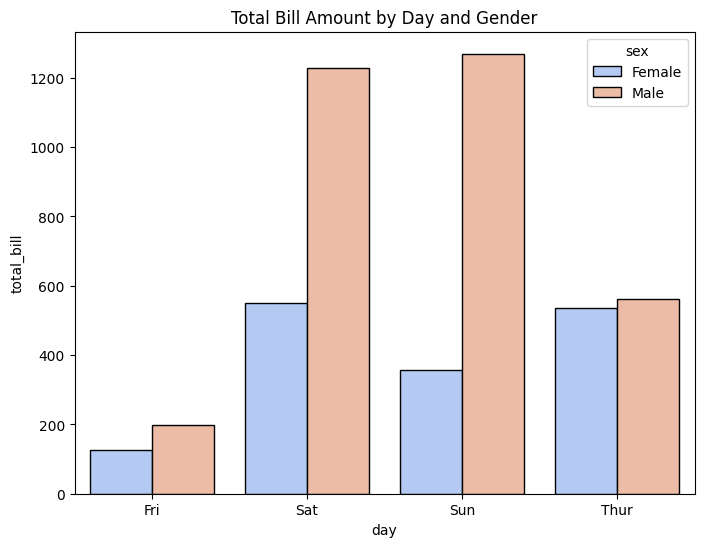

In [13]:
# Use Group by function 
plt.figure(figsize=(8,6))
total_bill_by_day_gender = tips.groupby(['day','sex'])['total_bill'].sum().reset_index()

sns.barplot(x='day',y='total_bill',hue='sex',
            data=total_bill_by_day_gender,
            palette='coolwarm',edgecolor='black')
plt.title("Total Bill Amount by Day and Gender")
plt.show();

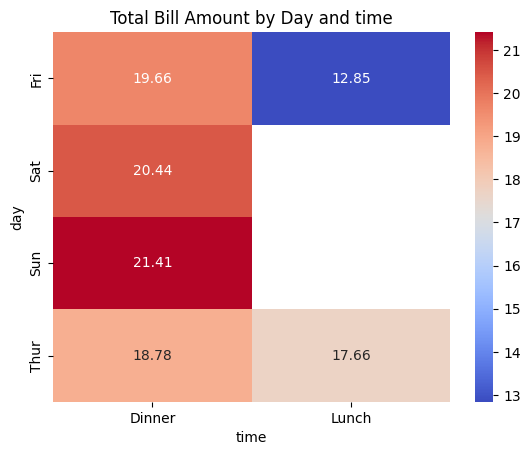

In [14]:
pivot_tip = tips.pivot_table(index='day',columns ='time',values ='total_bill')

sns.heatmap(pivot_tip,cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Total Bill Amount by Day and time')
plt.show();

In [15]:
print(tips.nunique())

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64


In [16]:
label_encoder = LabelEncoder()
tips["sex"] = label_encoder.fit_transform(tips["sex"])
tips["smoker"] = label_encoder.fit_transform(tips["smoker"])
tips["day"] = label_encoder.fit_transform(tips["day"])
tips["time"] = label_encoder.fit_transform(tips["time"])

correlation_with_tip = tips.corr()["tip"].abs().sort_values(ascending=False)

print(correlation_with_tip)

tip           1.000000
total_bill    0.675734
size          0.489299
time          0.121629
sex           0.088862
day           0.011548
smoker        0.005929
Name: tip, dtype: float64


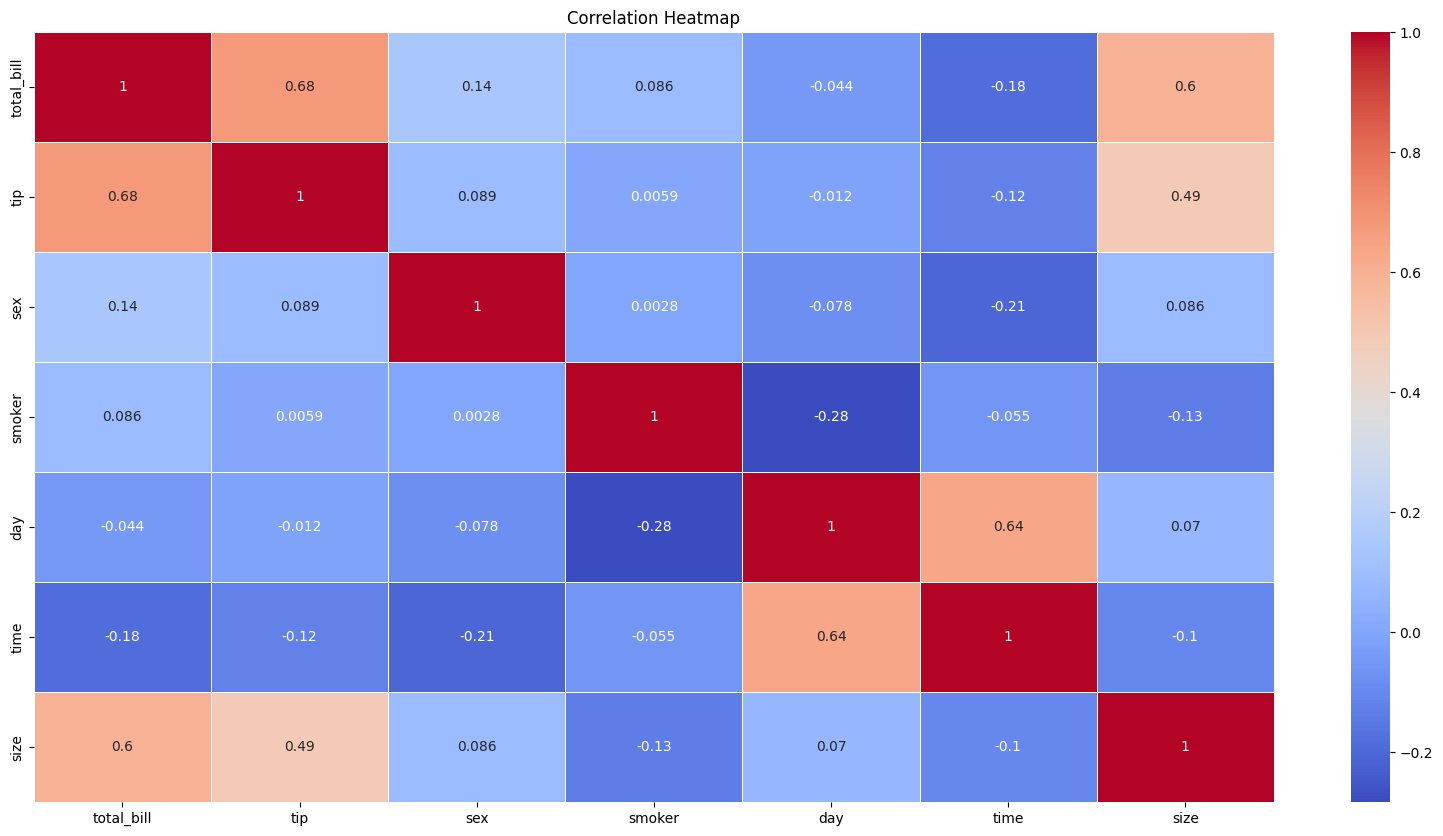

In [17]:
corr = tips.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
X = tips[['total_bill','tip','sex','smoker','day','time']]
y = tips['tip']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12)

In [20]:

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test,y_pred)

r2 = r2_score(y_test, y_pred)

print('MAE is : ',mae)
print('MSE is : ',mse)
print('R2 is  : ',r2)

MAE is :  2.5693732855610765e-15
MSE is :  1.1278497304365206e-29
R2 is  :  1.0


Sample of Actual vs Predicted Values:
Actual: 2.74, Predicted: 2.740000000000002
Actual: 2.5, Predicted: 2.499999999999998
Actual: 2.05, Predicted: 2.0499999999999967
Actual: 2.0, Predicted: 2.000000000000001
Actual: 5.92, Predicted: 5.92
Actual: 5.0, Predicted: 4.999999999999993
Actual: 3.0, Predicted: 2.999999999999999
Actual: 1.75, Predicted: 1.749999999999997
Actual: 4.67, Predicted: 4.6699999999999955
Actual: 4.06, Predicted: 4.060000000000001


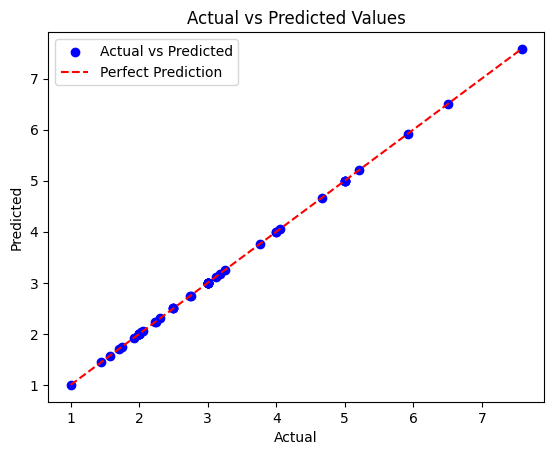

In [22]:
# Display a sample of actual vs predicted values
sample_size = 10  # Number of samples to display
sample_data = list(zip(y_test[:sample_size], y_pred[:sample_size]))

print("Sample of Actual vs Predicted Values:")
for actual, predicted in sample_data:
    print(f"Actual: {actual}, Predicted: {predicted}")

# Then plot as before
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


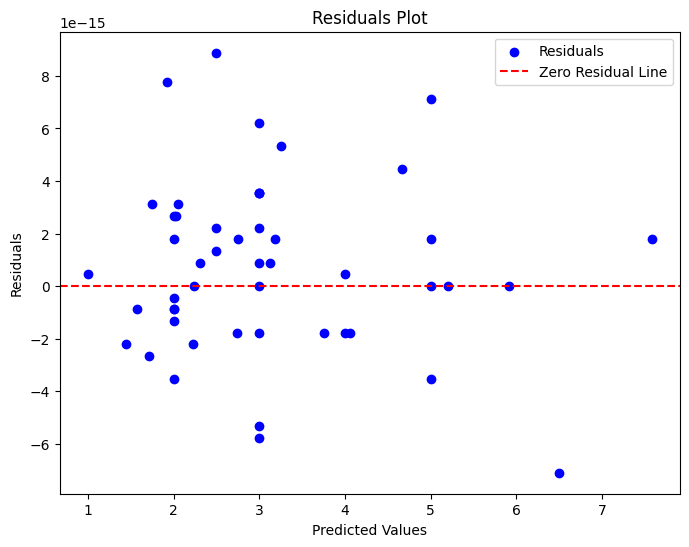

In [23]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))


plt.scatter(y_pred, residuals, color='blue', label='Residuals')


plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')


plt.legend()

plt.show()

c:\Users\Michael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


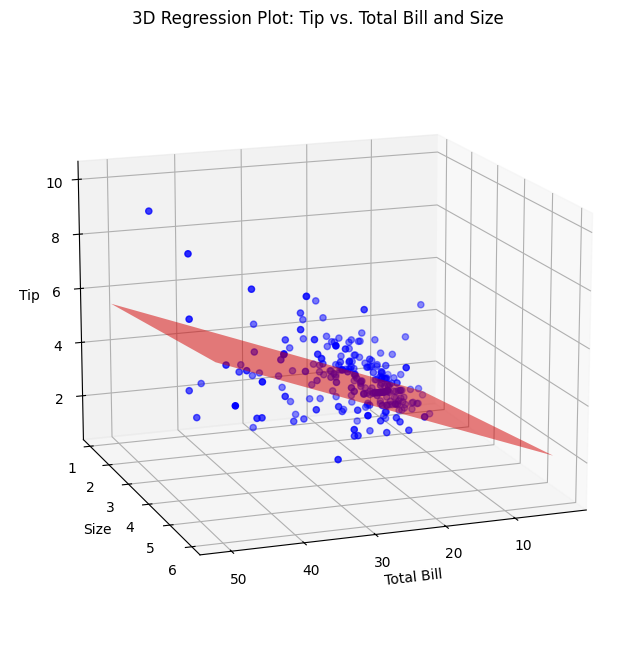

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Define the features and target variable
X = tips[['total_bill', 'size']]  # independent variables
y = tips['tip']  # dependent variable

# Create and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Get the predicted values
y_pred = model.predict(X)

# Prepare the meshgrid for the regression plane
x_range = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 30)
y_range = np.linspace(tips['size'].min(), tips['size'].max(), 30)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Predict the z values (tips) for each point on the grid
z_mesh = model.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])
z_mesh = z_mesh.reshape(x_mesh.shape)

# Plotting the 3D scatter plot and the regression plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data
ax.scatter(tips['total_bill'], tips['size'], y, color='blue', label='Actual Data')

# Plot the regression plane
ax.plot_surface(x_mesh, y_mesh, z_mesh, color='red', alpha=0.5, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel('Total Bill')
ax.set_ylabel('Size')
ax.set_zlabel('Tip')
ax.set_title('3D Regression Plot: Tip vs. Total Bill and Size')

# Adjust the view angle (You can modify these values)
ax.view_init(elev=15, azim=70)

# Show the plot
plt.show()



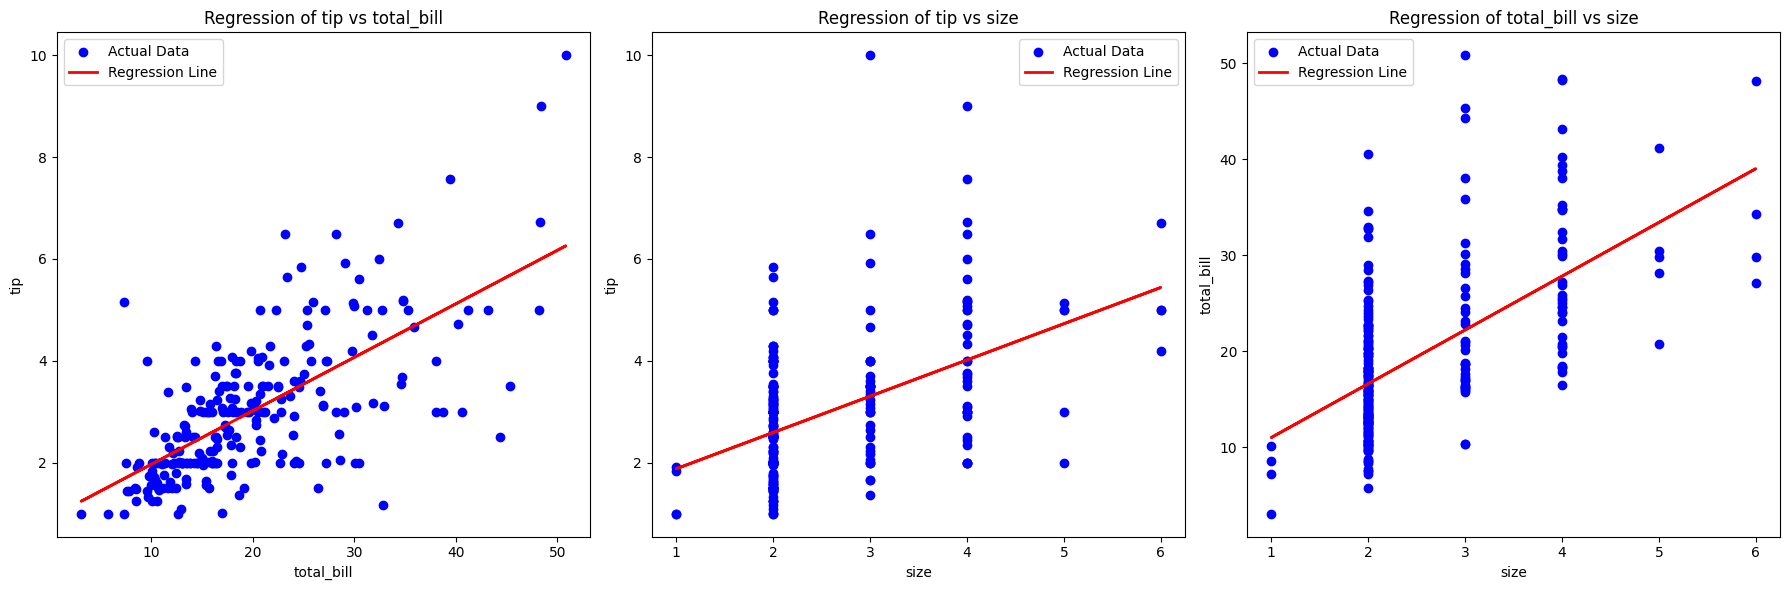

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Create the figure and axes for 3 subplots in a grid (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the pairs of variables for plotting
pairs = [
    ('total_bill', 'tip'),
    ('size', 'tip'),
    ( 'size', 'total_bill')
]

# Iterate over the pairs and plot on the respective axes
for i, (x_var, y_var) in enumerate(pairs):
    # Prepare the data
    X = tips[[x_var]]  # independent variable
    y = tips[y_var]   # dependent variable

    # Create and fit the regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the values
    y_pred = model.predict(X)

    # Scatter plot of the actual data
    axes[i].scatter(tips[x_var], tips[y_var], color='blue', label='Actual Data')

    # Plot the regression line
    axes[i].plot(tips[x_var], y_pred, color='red', linewidth=2, label='Regression Line')

    # Set titles and labels
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)
    axes[i].set_title(f'Regression of {y_var} vs {x_var}')
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
